Locating areas that require extra reinforcements for earthquake prone zones in JAPAN

In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/geospatial-learn-course-data/earthquakes1970-2014.csv
/kaggle/input/geospatial-learn-course-data/CA_county_high_earners.csv
/kaggle/input/geospatial-learn-course-data/japan-prefecture-population.csv
/kaggle/input/geospatial-learn-course-data/purple_martin.csv
/kaggle/input/geospatial-learn-course-data/top_universities.csv
/kaggle/input/geospatial-learn-course-data/Philippines_AL258.kml
/kaggle/input/geospatial-learn-course-data/starbucks_locations.csv
/kaggle/input/geospatial-learn-course-data/CA_county_median_age.csv
/kaggle/input/geospatial-learn-course-data/CA_county_population.csv
/kaggle/input/geospatial-learn-course-data/PhillyHealth_Air_Monitoring_Stations/PhillyHealth_Air_Monitoring_Stations/PhillyHealth_Air_Monitoring_Stations.prj
/kaggle/input/geospatial-learn-course-data/PhillyHealth_Air_Monitoring_Stations/PhillyHealth_Air_Monitoring_Stations/PhillyHealth_Air_Monitoring_Stations.shx
/kaggle/input/geospatial-learn-course-data/PhillyHealth_Air_Monitoring_Station

In [2]:
import folium
import geopandas as gpd
from folium import Choropleth
from folium.plugins import HeatMap


In [3]:
#defining a func for displaying interactive maps where the parameters are varable of map and the HTML file where it will be saved

def embed_map(m , file_name):
    from IPython.display import IFrame
    m.save(file_name)
    return IFrame(file_name , width = '100%' , height='500px')

In [4]:
plate_boundaries = gpd.read_file("../input/geospatial-learn-course-data/Plate_Boundaries/Plate_Boundaries/Plate_Boundaries.shp")


In [5]:
plate_boundaries

,HAZ_PLATES,HAZ_PLAT_1,HAZ_PLAT_2,Shape_Leng,geometry
0,TRENCH,SERAM TROUGH (ACTIVE),6722,5.843467,"LINESTRING (133.68089 -5.44420, 133.59740 -5.1..."
1,TRENCH,WETAR THRUST,6722,1.829013,"LINESTRING (125.47880 -7.76060, 125.52070 -7.7..."
2,TRENCH,TRENCH WEST OF LUZON (MANILA TRENCH) NORTHERN ...,6621,6.743604,"LINESTRING (120.10000 19.81790, 120.02780 19.6..."
3,TRENCH,BONIN TRENCH,9821,8.329381,"LINESTRING (143.20621 26.17590, 143.28799 26.8..."
4,TRENCH,NEW GUINEA TRENCH,8001,11.998145,"LINESTRING (132.82730 0.41880, 132.97459 0.473..."
...,...,...,...,...,...
355,TRANSFORM FAULT,VIRGIN ISLANDS TRANSFORM FAULTS,2014,1.196272,"LINESTRING (-65.43810 17.68930, -65.21780 17.7..."
356,TRANSFORM FAULT,VIRGIN ISLANDS TRANSFORM FAULTS,2014,1.154880,"LINESTRING (-63.80830 18.67500, -63.60480 18.7..."
357,TRANSFORM FAULT,SW HISPANIOLA TRANSFORM FAULTS,2014,2.061952,"LINESTRING (-75.41050 18.15860, -75.31710 18.1..."
358,TRANSFORM FAULT,SW HISPANIOLA TRANSFORM FAULTS,2014,2.668446,"LINESTRING (-73.53190 18.48440, -73.37850 18.4..."


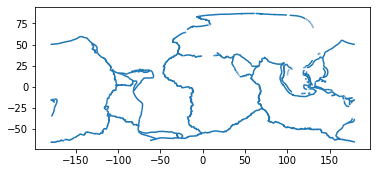

In [6]:
plate_boundaries.plot()

In [7]:
plate_boundaries['coordinates'] = plate_boundaries.apply(lambda x: [(b,a) for (a,b) in list(x.geometry.coords)], axis='columns')
plate_boundaries

,HAZ_PLATES,HAZ_PLAT_1,HAZ_PLAT_2,Shape_Leng,geometry,coordinates
0,TRENCH,SERAM TROUGH (ACTIVE),6722,5.843467,"LINESTRING (133.68089 -5.44420, 133.59740 -5.1...","[(-5.444200361999947, 133.6808931800001), (-5...."
1,TRENCH,WETAR THRUST,6722,1.829013,"LINESTRING (125.47880 -7.76060, 125.52070 -7.7...","[(-7.760600482999962, 125.47879802900002), (-7..."
2,TRENCH,TRENCH WEST OF LUZON (MANILA TRENCH) NORTHERN ...,6621,6.743604,"LINESTRING (120.10000 19.81790, 120.02780 19.6...","[(19.817899819000047, 120.09999798800004), (19..."
3,TRENCH,BONIN TRENCH,9821,8.329381,"LINESTRING (143.20621 26.17590, 143.28799 26.8...","[(26.175899215000072, 143.20620700100005), (26..."
4,TRENCH,NEW GUINEA TRENCH,8001,11.998145,"LINESTRING (132.82730 0.41880, 132.97459 0.473...","[(0.41880004000006466, 132.8273013480001), (0...."
...,...,...,...,...,...,...
355,TRANSFORM FAULT,VIRGIN ISLANDS TRANSFORM FAULTS,2014,1.196272,"LINESTRING (-65.43810 17.68930, -65.21780 17.7...","[(17.68930094500007, -65.43810299699999), (17...."
356,TRANSFORM FAULT,VIRGIN ISLANDS TRANSFORM FAULTS,2014,1.154880,"LINESTRING (-63.80830 18.67500, -63.60480 18.7...","[(18.674998994000077, -63.80830014099996), (18..."
357,TRANSFORM FAULT,SW HISPANIOLA TRANSFORM FAULTS,2014,2.061952,"LINESTRING (-75.41050 18.15860, -75.31710 18.1...","[(18.158599879000064, -75.41049989899994), (18..."
358,TRANSFORM FAULT,SW HISPANIOLA TRANSFORM FAULTS,2014,2.668446,"LINESTRING (-73.53190 18.48440, -73.37850 18.4...","[(18.484399517000043, -73.53189800799998), (18..."


In [8]:
plate_boundaries['coordinates']

0      [(-5.444200361999947, 133.6808931800001), (-5....
1      [(-7.760600482999962, 125.47879802900002), (-7...
2      [(19.817899819000047, 120.09999798800004), (19...
3      [(26.175899215000072, 143.20620700100005), (26...
4      [(0.41880004000006466, 132.8273013480001), (0....
                             ...                        
355    [(17.68930094500007, -65.43810299699999), (17....
356    [(18.674998994000077, -63.80830014099996), (18...
357    [(18.158599879000064, -75.41049989899994), (18...
358    [(18.484399517000043, -73.53189800799998), (18...
359    [(19.82939951700007, -71.63120297699999), (19....
Name: coordinates, Length: 360, dtype: object

In [9]:
plate_boundaries['geometry']

0      LINESTRING (133.68089 -5.44420, 133.59740 -5.1...
1      LINESTRING (125.47880 -7.76060, 125.52070 -7.7...
2      LINESTRING (120.10000 19.81790, 120.02780 19.6...
3      LINESTRING (143.20621 26.17590, 143.28799 26.8...
4      LINESTRING (132.82730 0.41880, 132.97459 0.473...
                             ...                        
355    LINESTRING (-65.43810 17.68930, -65.21780 17.7...
356    LINESTRING (-63.80830 18.67500, -63.60480 18.7...
357    LINESTRING (-75.41050 18.15860, -75.31710 18.1...
358    LINESTRING (-73.53190 18.48440, -73.37850 18.4...
359    LINESTRING (-71.63120 19.82940, -71.45120 19.7...
Name: geometry, Length: 360, dtype: geometry

In [10]:
plate_boundaries.drop('geometry' , axis = 1 , inplace=True)
plate_boundaries.head()

,HAZ_PLATES,HAZ_PLAT_1,HAZ_PLAT_2,Shape_Leng,coordinates
0,TRENCH,SERAM TROUGH (ACTIVE),6722,5.843467,"[(-5.444200361999947, 133.6808931800001), (-5...."
1,TRENCH,WETAR THRUST,6722,1.829013,"[(-7.760600482999962, 125.47879802900002), (-7..."
2,TRENCH,TRENCH WEST OF LUZON (MANILA TRENCH) NORTHERN ...,6621,6.743604,"[(19.817899819000047, 120.09999798800004), (19..."
3,TRENCH,BONIN TRENCH,9821,8.329381,"[(26.175899215000072, 143.20620700100005), (26..."
4,TRENCH,NEW GUINEA TRENCH,8001,11.998145,"[(0.41880004000006466, 132.8273013480001), (0...."


In [11]:
#HISTORICAL DATA OF EARTHQUAKES
earthquakes = pd.read_csv("../input/geospatial-learn-course-data/earthquakes1970-2014.csv", parse_dates=["DateTime"])
earthquakes.head()

,DateTime,Latitude,Longitude,Depth,Magnitude,MagType,NbStations,Gap,Distance,RMS,Source,EventID
0,1970-01-04 17:00:40.200,24.139,102.503,31.0,7.5,Ms,90.0,NaN,NaN,0.0,NEI,1.970010e+09
1,1970-01-06 05:35:51.800,-9.628,151.458,8.0,6.2,Ms,85.0,NaN,NaN,0.0,NEI,1.970011e+09
2,1970-01-08 17:12:39.100,-34.741,178.568,179.0,6.1,Mb,59.0,NaN,NaN,0.0,NEI,1.970011e+09
3,1970-01-10 12:07:08.600,6.825,126.737,73.0,6.1,Mb,91.0,NaN,NaN,0.0,NEI,1.970011e+09
4,1970-01-16 08:05:39.000,60.280,-152.660,85.0,6.0,ML,0.0,NaN,NaN,NaN,AK,NaN


In [12]:
#creating a base map with plate boundaries
m_1 = folium.Map(location = [35,136] , tiles = 'cartodbpositron' , zoom_start=5)
m_1

In [13]:
for i in range(len(plate_boundaries)):
    folium.PolyLine(locations = plate_boundaries.coordinates.iloc[i] , weight  = 2 , color='red').add_to(m_1)
HeatMap(data=earthquakes[['Latitude' , 'Longitude']] , radius=10).add_to(m_1)
embed_map(m_1 , 'q_2.html')

In [15]:
earthquakes

,DateTime,Latitude,Longitude,Depth,Magnitude,MagType,NbStations,Gap,Distance,RMS,Source,EventID
0,1970-01-04 17:00:40.200,24.1390,102.5030,31.00,7.5,Ms,90.0,NaN,NaN,0.00,NEI,1.970010e+09
1,1970-01-06 05:35:51.800,-9.6280,151.4580,8.00,6.2,Ms,85.0,NaN,NaN,0.00,NEI,1.970011e+09
2,1970-01-08 17:12:39.100,-34.7410,178.5680,179.00,6.1,Mb,59.0,NaN,NaN,0.00,NEI,1.970011e+09
3,1970-01-10 12:07:08.600,6.8250,126.7370,73.00,6.1,Mb,91.0,NaN,NaN,0.00,NEI,1.970011e+09
4,1970-01-16 08:05:39.000,60.2800,-152.6600,85.00,6.0,ML,0.0,NaN,NaN,NaN,AK,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5299,2013-12-01 06:29:57.800,2.0440,96.8261,20.00,6.0,Mw,NaN,27.0,1.0,0.89,us,2.013120e+09
5300,2013-12-08 17:24:54.200,44.4438,149.1667,28.00,6.1,Mw,NaN,26.0,5.0,0.99,us,2.013121e+09
5301,2013-12-17 23:38:08.100,20.7635,146.7599,16.06,6.2,Mw,NaN,14.0,4.0,0.74,us,2.013122e+09
5302,2014-01-01 16:03:28.890,-13.8779,167.2434,187.00,6.5,Mw,NaN,14.0,4.0,0.67,us,2.014010e+09


In [16]:
m_2 = folium.Map(location = [35,136] , tiles='cartodbpositron' , zoom_start = 5)
for i in range(len(plate_boundaries)):
    folium.PolyLine(locations=plate_boundaries.coordinates.iloc[i] , weight=2 , color='red').add_to(m_2)

In [17]:
m_2

In [26]:
#checking the depth of plate boundaries to tremor intensity
#custom function to assign a color to each circle

def color_producer(val):
    if val<50:
        return 'forestgreen'
    elif val<100:
        return 'darkorange'
    else:
        return 'darkred'
#adding a map to visualize earthquake depth

for i in range(0,len(earthquakes)):
    folium.Circle(
    location=[earthquakes.iloc[i]['Latitude'],earthquakes.iloc[i]['Longitude']],
    radius=2000,
    color = color_producer(earthquakes.iloc[i]['Depth'])).add_to(m_2)
embed_map(m_2 , 'q_3.html')

<h1>insights obtained</h1>

the earthquakes which are appeared in less depth i.e., green points are nearer to the plate boundaries but where as quakes which are at greater depth are farther from the plate boundaries

In [27]:
# GEODataFrame with prefecture boundaries
prefectures = gpd.read_file("../input/geospatial-learn-course-data/japan-prefecture-boundaries/japan-prefecture-boundaries/japan-prefecture-boundaries.shp")
prefectures.set_index('prefecture', inplace=True)

prefectures.head()

,geometry
prefecture,
Aichi,"MULTIPOLYGON (((137.09523 34.65330, 137.09546 ..."
Akita,"MULTIPOLYGON (((139.55725 39.20330, 139.55765 ..."
Aomori,"MULTIPOLYGON (((141.39860 40.92472, 141.39806 ..."
Chiba,"MULTIPOLYGON (((139.82488 34.98967, 139.82434 ..."
Ehime,"MULTIPOLYGON (((132.55859 32.91224, 132.55904 ..."


In [29]:
#population
population = pd.read_csv("../input/geospatial-learn-course-data/japan-prefecture-population.csv")
population.set_index('prefecture', inplace=True)
population.head()

,population
prefecture,
Tokyo,12868000
Kanagawa,8943000
Osaka,8801000
Aichi,7418000
Saitama,7130000


In [31]:
#Area in sqkms
#calculating area of each prefecture
area_sqkm = pd.Series(prefectures.geometry.to_crs(epsg=32654).area/10**6 , name='area_sqkm')
stats = population.join(area_sqkm)

stats.head()

/opt/conda/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,population,area_sqkm
prefecture,,
Tokyo,12868000,1800.614782
Kanagawa,8943000,2383.038975
Osaka,8801000,1923.151529
Aichi,7418000,5164.400005
Saitama,7130000,3794.036890


In [32]:
#density per sqkm
stats['density']=stats['population']/stats['area_sqkm']
stats.head()

,population,area_sqkm,density
prefecture,,,
Tokyo,12868000,1800.614782,7146.448049
Kanagawa,8943000,2383.038975,3752.771186
Osaka,8801000,1923.151529,4576.342460
Aichi,7418000,5164.400005,1436.372085
Saitama,7130000,3794.036890,1879.264806


In [33]:
#creating a base map
m_3 = folium.Map(location = [35,136] , tiles = 'cartodbpositron' , zoom_start = 5)


Choropleth(geo_data=prefectures['geometry'].__geo_interface__,
           data=stats['density'],
           key_on="feature.id",
           fill_color='YlGnBu',
           legend_name='Population density (per square kilometer)'
          ).add_to(m_3)

embed_map(m_3 , 'q_3.html')

<h2>Regions that are high density and are more prone to quakes</h2>


In [35]:
# Creating a base map
m_4 = folium.Map(location=[35,136], tiles='cartodbpositron', zoom_start=5)

In [36]:
# Create a map
def color_producer(magnitude):
    if magnitude > 6.5:
        return 'red'
    else:
        return 'green'

Choropleth(
    geo_data=prefectures['geometry'].__geo_interface__,
    data=stats['density'],
    key_on="feature.id",
    fill_color='BuPu',
    legend_name='Population density (per square kilometer)').add_to(m_4)

for i in range(0,len(earthquakes)):
    folium.Circle(
        location=[earthquakes.iloc[i]['Latitude'], earthquakes.iloc[i]['Longitude']],
        popup=("{} ({})").format(
            earthquakes.iloc[i]['Magnitude'],
            earthquakes.iloc[i]['DateTime'].year),
        radius=earthquakes.iloc[i]['Magnitude']**5.5,
        color=color_producer(earthquakes.iloc[i]['Magnitude'])).add_to(m_4)

embed_map(m_4,'q_5.html')

final insights:

        tokyo , osaka require more reinforcements .